# 吴恩达机器学习作业Python实现(一)：线性回归

## 单变量线性回归
在本部分的练习中，您将使用一个变量实现线性回归，以预测食品卡车的利润：
假设你是一家餐馆的首席执行官，正在考虑不同的城市开设一个新的分店。该连锁店已经在各个城市拥有卡车，而且你有来自城市的利润和人口数据。
您希望使用这些数据来帮助您选择将哪个城市扩展到下一个城市。

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据集并查看：
注意：开始任何任务之前，通过可视化来理解数据通常是有用的。在这个数据集中，只有两个属性（利润和人口），可以绘制散点图。许多其他问题是多维度的，例如下面的多变量线性回归的例子，就不能再二维图上画出来。

.describe()显示各统计值

In [10]:
path = r'ex1data1.txt'
data = pd.read_csv(path,names=['Population','Profit'])
print(data.describe())

       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


绘制散点图：
plt.scatter(x,y)

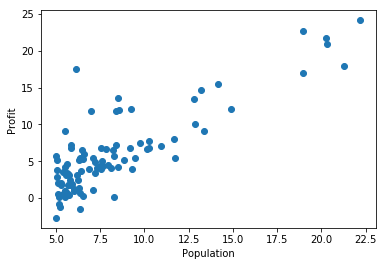

In [11]:
plt.scatter(data['Population'], data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
#data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))
plt.show()

### 实现代价函数表达式，为所需各变量赋值
代价函数表达式：$$J(\theta_0,\theta_1,...,\theta_n)=\frac{\sum_{i=1}^m{({h_\theta(x^{(i)})}-y^{(i)})}^2}{2m}$$其中$$h_\theta=\theta^TX=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

In [12]:
def computeCost(X,Y,theta):
    inner = np.power((X*theta.T)-Y,2)
    return np.sum(inner)/(2*len(X))

数据集插入一列方便之后进行向量运算，作为$x_0$,值均为1：

In [13]:
data.insert(0,'Ones',1)
print(data.head())

   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


对表达式中自变量X，因变量Y，未知参数θ初始化
（1）data.shape[1]表示列数，data.shape[0]表示行数。
（2）data.iloc[]函数通过行号来取行数据
     data.iloc[:,cols-1:cols]提取最后一列数据，从0开始计数

In [14]:
#set X(training data) and Y(target varible)
cols = data.shape[1] #列数
X = data.iloc[:,0:cols-1] 
Y = data.iloc[:,cols-1:cols] #取最后一列，即目标向量

将X,Y转换为矩阵，初始化theta为一个（1,2）矩阵：
转换为矩阵是为了方便矩阵运算，对于矩阵matrix，*即为点乘，而对于数组array，*为对应位置元素相乘，若要点乘，则需要用到np.dot(X1,X2)

In [15]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta =np.matrix([0,0])

### 实现梯度下降函数
bathch gradient decent(批量梯度下降)
$$\theta_j:=\theta_j-\alpha\frac{\partial}{partial\theta_j}J(\theta)$$
$$\theta_j:=\theta_j-\alpha\frac{\sum_{i=1}^m{({h_\theta(x^{(i)})}-y^{(i)})}{x_j}^{(i)}}{m}$$

In [16]:
def gradientDescent(X, Y, theta, alpha, epoch):
    temp = np.matrix(np.zeros(theta.shape))  # 初始化一个临时矩阵(1, 2)
    cost = np.zeros(epoch)                   # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]                           # m为总的样本数
    #利用向量化一步求解
    for i in range(epoch):
        temp = theta - (alpha / m) * (X * theta.T - Y).T * X
        theta = temp
        cost[i] = computeCost(X,Y,theta) #得到每次迭代代价函数的值
    return theta,cost

#初始化学习率α和要进行迭代的次数
alpha = 0.01
epoch = 1000
#现在让我们运行梯度下降算法来将我们的参数θ适合于训练集
final_theta,cost = gradientDescent(X,Y,theta,alpha,epoch)

### 绘制线性模型，直观看出拟合
（1）np.linspace()在指定的间隔内返回均匀间隔的数字。

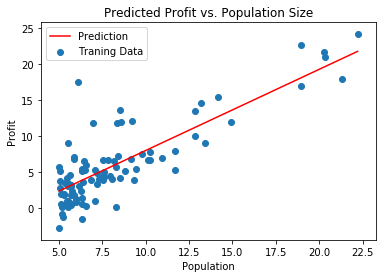

In [17]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = final_theta[0,0] + (final_theta[0,1] * x) 

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data.Profit, label='Traning Data')
ax.legend(loc=2)  # 2表示在左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。

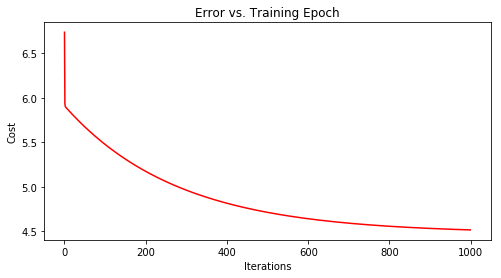

In [18]:
fig,ax = plt.subplots(figsize = (8,4))
ax.plot(np.arange(epoch),cost,'r') #np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 正规方程法

In [19]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T*X)*X.T*y#X.T*X等价于X.T.dot(X)
    return theta.T
final_theta2 = normalEqn(X,Y)

打印两种方法的得到的参数值：

In [20]:
print(final_theta,'\n',final_theta2)

[[-3.24140214  1.1272942 ]] 
 [[-3.89578088  1.19303364]]


## 多变量线性回归
练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。
### 导入数据集并查看

In [21]:
path = r'ex1data2.txt'
data = pd.read_csv(path,names = ['sizes','rooms','prices'])
print(data.head())

   sizes  rooms  prices
0   2104      3  399900
1   1600      3  329900
2   2400      3  369000
3   1416      2  232000
4   3000      4  539900


对于此任务，我们添加了另一个预处理步骤：特征缩放，否则以$\theta_1$，$\theta_2$两个参数分别为横纵坐标，绘制代价函数的等高线图能，看出图像会显得很扁，梯度下降算法需要非常多次的迭代才能收敛。
解决的方法是尝试将所有特征的尺度都尽量缩放到-1 到 1 之间：
$$\frac{x_n-\mu_n}{s_n}$$其中$\mu_n$是平均值，$s_n$是标准差。

In [22]:
data['sizes'] = (data['sizes'] - data['sizes'].mean())/data['sizes'].std()
data['rooms'] = (data['rooms'] - data['rooms'].mean())/data['rooms'].std()
data['prices'] = (data['prices'] - data['prices'].mean())/data['prices'].std()
print(data.head())

      sizes     rooms    prices
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


### 实现代价函数表达式，为所需各变量赋值
此步骤除代价函数表达式与单变量线性回归有所不同，参数个数增加外，处理方式与单变量线性回归相同。
代价函数表达式：$$J(\theta_0,\theta_1,...,\theta_n)=\frac{\sum_{i=1}^m{({h_\theta(x^{(i)})}-y^{(i)})}^2}{2m}$$其中$$h_\theta=\theta^TX=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

In [23]:
theta = np.matrix(np.zeros(3))
#插入一列，作为x0,值为1
data.insert(0,'ones',1)
cols = data.shape[1]
#X = np.matrix(data[:2]) 仅选取前两行
X = np.matrix(data.iloc[:,0:cols-1])
Y = np.matrix(data.iloc[:,cols-1:cols])
#代价函数
def computeCost(X,Y,theta):
    m = X.shape[0]
    return np.sum(np.power((X*theta.T) - Y,2))/(2*m)


### 实现梯度下降算法

In [24]:
#梯度下降
def gradientDescent(X,Y,theta,alpha,epoch):
    m = X.shape[0]
    cost = []
    for i in range(epoch):
        theta = theta - alpha/m*(X*theta.T - Y).T*X
        cost.append(computeCost(X,Y,theta))       #列表添加元素
    return theta,cost

alpha = 0.01
epoch = 1000
final_theta,cost = gradientDescent(X,Y,theta,alpha,epoch)
final_cost = computeCost(X,Y,final_theta)
print(final_cost)

0.13070336960771892


### 画图查看训练过程

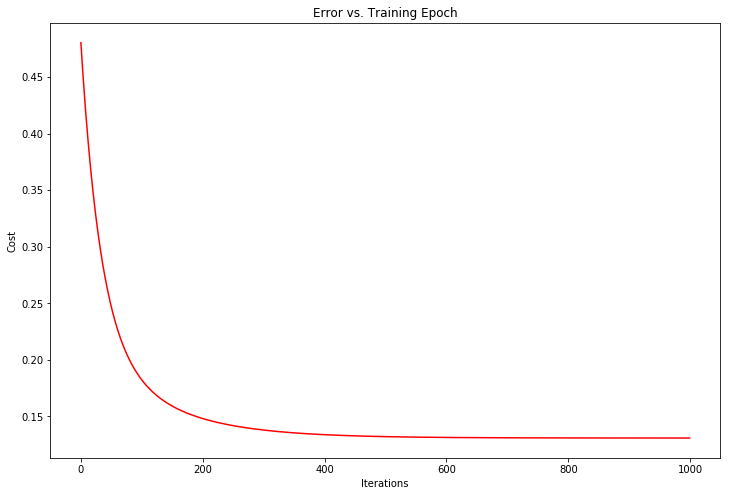

In [25]:
#画图查看训练过程
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 正规方程法

In [26]:
#正规方程法
def normalEqn(X, y):
    theta = np.linalg.inv(X.T*X)*X.T*y#X.T*X等价于X.T.dot(X)
    return theta.T
final_theta2 = normalEqn(X,Y)

打印两种方法的得到的参数值：

In [27]:
print(final_theta,'\n',final_theta2)

[[-1.11113782e-16  8.78503652e-01 -4.69166570e-02]] 
 [[-1.17961196e-16  8.84765988e-01 -5.31788197e-02]]
